## Analisi SIMOG

Il seguente notebook analizza la spesa ICT per gli anni 2013-2017.

In particolare, vengono consiterate spese ict tutti i contratti aventi i seguenti codici cpv:
    - 302*: Apparecchiature informatiche e forniture;
    - 35710000: Sistemi elettronici di comando, controllo, comunicazione e informatici;
    - 39134*: Arredo informatico;    
    - 42960000: Sistemi di comando e controllo, attrezzature per stampa, grafica, automazione uffici e trattamento dell'informazione
    - 48*: Pacchetti software e sistemi di informazione
    - 503*: Servizi di riparazione, manutenzione e servizi affini connessi a personal computer, attrezzature d'ufficio, apparecchiature per telecomunicazione e impianti audiovisivi
    - 72*: Servizi informatici: consulenza, sviluppo di software, Internet e supporto
    - 80533*: Servizi di avviamento e istruzione per utenti di elaboratori elettronici

In [96]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import math
from matplotlib import pyplot as plt


In [3]:
df = pd.read_pickle("data/simog/simog.pkl")
#df = pd.read_json("data/simog/simog.json",  lines=True, chunksize=100000)

In [4]:
df.head()

,cf_amministrazione,denominazione_amministrazione,data_pubblicazione,id_gara,cig,oggetto_gara,oggetto_lotto,cig_acc_quadro,codice_cpv,descrizione_cpv,...,luogo_istat,sigla_provincia,luogo_nuts,flag_escluso,motivo_esclusione,id_categoria_prevalente,descrizione_categoria,data_aggiudicazione_def,ts,processing_dttm
0,01464630423,AZ.OPS.UNIV.OSPEDALI RIUN.UMBERTO I-LANCISI-SA...,2018-06-14,7121247,75334542E8,Gara Farmaci SUAM - LOTTO 839 - CIPROFLOXACINA...,AOAN - LOTTO 839 - CIPROFLOXACINA (cod. ATC J0...,715786483A,33680000-0,ARTICOLI DI FARMACIA,...,,,ITI3,N,,FB,FORNITURA DI BENI,,2018-06-25 18:42:13.14,1530153187987
1,01464630423,AZ.OPS.UNIV.OSPEDALI RIUN.UMBERTO I-LANCISI-SA...,2018-06-14,7121250,7533457561,Gara Farmaci SUAM - LOTTO 364 - MANNITOLO (cod...,AOAN - LOTTO 364 - MANNITOLO (cod. ATC B05BC01...,7157384C1D,33680000-0,ARTICOLI DI FARMACIA,...,,,ITI3,N,,FB,FORNITURA DI BENI,,2018-06-25 18:42:13.14,1530153187987
2,01464630423,AZ.OPS.UNIV.OSPEDALI RIUN.UMBERTO I-LANCISI-SA...,2018-06-14,7121259,7533465BF9,Gara Farmaci SUAM - LOTTO 270 - CIANOCOBALAMIN...,AOAN - LOTTO 270 - CIANOCOBALAMINA (cod. ATC B...,7157290E8A,33680000-0,ARTICOLI DI FARMACIA,...,,,ITI3,N,,FB,FORNITURA DI BENI,,2018-06-25 18:42:13.14,1530153187987
3,01464630423,AZ.OPS.UNIV.OSPEDALI RIUN.UMBERTO I-LANCISI-SA...,2018-06-14,7121262,7533468E72,Gara Farmaci SUAM - LOTTO 543 - CANDESARTAN CI...,AOAN - LOTTO 543 - CANDESARTAN CILEXETIL (cod....,7157566251,33680000-0,ARTICOLI DI FARMACIA,...,,,ITI3,N,,FB,FORNITURA DI BENI,,2018-06-25 18:42:13.14,1530153187987
4,01464630423,AZ.OPS.UNIV.OSPEDALI RIUN.UMBERTO I-LANCISI-SA...,2018-06-14,7121265,75334721C3,Gara Farmaci SUAM - LOTTO 1309 - SODIO VALPROA...,AOAN - LOTTO 1309 - SODIO VALPROATO/ACIDO VALP...,7158339038,33680000-0,ARTICOLI DI FARMACIA,...,,,ITI3,N,,FB,FORNITURA DI BENI,,2018-06-25 18:42:13.14,1530153187987


In [6]:
def filterIT(s):
    try:
        m_obj = re.search(r'^(302|35710000|39134|42960000|48|503|72|80533)', s)
        if m_obj:
            return True
        return False
    
    except:
        return False

In [46]:
it_df = df[df.codice_cpv.apply(filterIT)]
it_df['data_pubblicazione'] = pd.to_datetime(it_df['data_pubblicazione'], errors='coerce')
it_df['data_aggiudicazione_def'] = pd.to_datetime(it_df['data_aggiudicazione_def'], errors='coerce')
it_df['processing_dttm'] = it_df['processing_dttm'].astype(np.int64)


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [8]:
it_df["importo_totale_bando_n"] = pd.to_numeric(it_df.importo_totale_bando, errors='coerce')

it_df["data_pubblicazione_anno"] = it_df.data_pubblicazione.apply(lambda x: x.year)
#it_df["data_pubblicazione_anno"].value_counts()

it_df["data_aggiudicazione_def_anno"] = it_df.data_aggiudicazione_def.apply(lambda x: x.year)
#it_df["data_aggiudicazione_def_anno"].value_counts()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## ANALISI ANNI 2013-2017

In [22]:
it_df_2013_2017 = it_df[(it_df["data_aggiudicazione_def_anno"]< 2018) & (it_df["data_aggiudicazione_def_anno"]> 2012)]

### Rimozione duplicati
Il dataset è composto da cig duplicati (i.e. 1094 data record), si procede con l'eliminazione dei dare record con timestamp di processing più remoti


In [80]:
print(it_df_2013_2017.cig.value_counts()[:10])
it_df_2013_2017_unique = it_df_2013_2017.sort_values('processing_dttm', ascending=False).drop_duplicates('cig').sort_index()

7035112613    23
70216744B0     6
6872607EB2     5
67526796FD     5
703289508E     5
70456752F1     4
3864420C41     4
6754970994     4
7010577F24     4
7002405767     4
Name: cig, dtype: int64


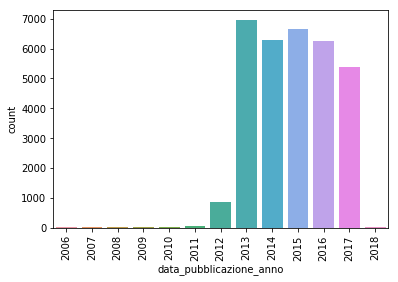

In [138]:
import seaborn as sns
sns.countplot(x="data_pubblicazione_anno", data=it_df_2013_2017_unique)
plt.xticks(rotation=90)
plt.show()

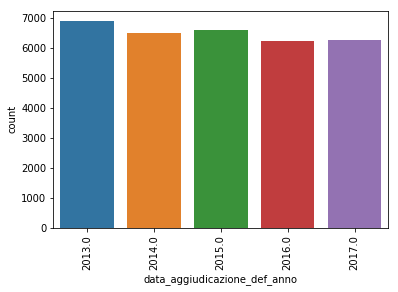

In [137]:
import seaborn as sns
sns.countplot(x="data_aggiudicazione_def_anno", data=it_df_2013_2017_unique)
plt.xticks(rotation=90)
plt.show()

In [94]:
spesa = {}

for y in range(2013, 2018):
    spesa[y] = it_df_2013_2017_unique[it_df_2013_2017_unique["data_aggiudicazione_def_anno"] == y].importo_totale_bando_n.sum()/math.pow(10, 9)

print("spesa per anno in miliardi di euro")    
spesa

spesa per anno in miliardi di euro


{2013: 5.68515964208,
 2014: 4.706262345959001,
 2015: 10.487345496389999,
 2016: 14.406378169389999,
 2017: 13.13564507884}

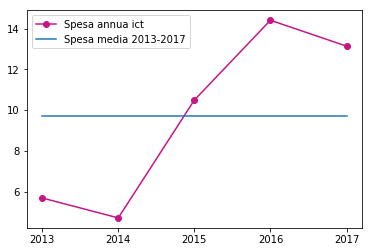

In [136]:
#ax = sns.lineplot(x=spesa.keys, y=spesa.values, hue="event", err_style="bars", ci=68)
import seaborn as sns

mean = np.mean(list(spesa.values()))

plt.plot( spesa.keys(), spesa.values(), marker='o', color='mediumvioletred',  label='Spesa annua ict')
plt.plot(spesa.keys(), np.full((len(spesa.keys())), mean),  label='Spesa media 2013-2017')
plt.xticks(list(spesa.keys()))
plt.legend()
plt.show()


### Analisi spesa per cvp